# Rdkit进行分子部分构造的检索与可视化

In [2]:
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Scaffolds import MurckoScaffold
import pubchempy as pcp
from rdkit.Chem import rdFMCS
from matplotlib.colors import ColorConverter
import pandas as pd

In [3]:
df = pd.read_csv('./data/PubChem_compound_text_EGFR.csv')
cid=df['cid']
df

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,...,gpfamilycnt,neighbortype,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,depcatg,annotation
0,121280087,Almonertinib,Almonertinib|HS-10296|1899921-05-1|Aumolertini...,525.6,C30H35N7O2,87.6,823.0,4.2,39,2,...,10,2D+3D,NaN,Biological Test Results|Classification|Drug an...,9,1709312|1709313|1709314|1709315|1709316|170931...,20160806,001Chemical|A2B Chem|AA BLOCKS|Aaron Chemicals...,Chemical Vendors|Curation Efforts|Governmental...,C274 - Antineoplastic Agent > C163758 - Target...
1,10184653,Afatinib,Afatinib|439081-18-2|850140-72-6|Tovok|BIBW299...,485.9,C24H25ClFN5O3,88.6,702.0,3.6,34,2,...,5860,2D+3D,Afatinib,Biological Test Results|Classification|Drug an...,11,1|3|5|7|9|13|15|19|21|23|25|29|31|33|35|37|39|...,20061025,"001Chemical|A&J Pharmtech CO., LTD.|A2B Chem|A...",Chemical Vendors|Curation Efforts|Governmental...,C274 - Antineoplastic Agent > C163758 - Target...
2,176871,Erlotinib hydrochloride,Erlotinib hydrochloride|183319-69-9|erlotinib ...,429.9,C22H24ClN3O4,74.7,525.0,NaN,30,2,...,15,2D,Erlotinib Hydrochloride,Biological Test Results|Classification|Drug an...,11,1|3|5|7|9|13|15|19|21|23|25|29|31|33|35|37|39|...,20050326,001Chemical|3WAY PHARM INC|4C Pharma Scientifi...,Chemical Vendors|Curation Efforts|Governmental...,C274 - Antineoplastic Agent > C163758 - Target...
3,117909640,"N-(3-(2-((2,3-Difluoro-4-(4-(2-hydroxyethyl)pi...","olafertinib|1660963-42-7|RX-518|N-(3-(2-((2,3-...",530.6,C29H28F2N6O2,93.6,815.0,4.3,39,3,...,7,2D+3D,NaN,Biological Test Results|Classification|Drug an...,7,1796605|1804410|1806453|1806454|1806455|180645...,20160223,001Chemical|A2B Chem|AA BLOCKS|Aaron Chemicals...,Chemical Vendors|Curation Efforts|Governmental...,C274 - Antineoplastic Agent > C163758 - Target...
4,156538665,PA4Pth5HL9,BLU-945|2660250-10-0|BLU945|PA4PTH5HL9|UNII-PA...,556.7,C28H37FN6O3S,109.0,922.0,4.6,39,1,...,4,2D,NaN,Classification|Drug and Medication Information...,5,NaN,20210821,A2B Chem|AA BLOCKS|AbaChemScene|AbMole Bioscie...,Chemical Vendors|Curation Efforts|Governmental...,C274 - Antineoplastic Agent > C163758 - Target...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,118870,"2H-1-Benzopyran-2-one, 3-(2-benzoxazolyl)-7-(d...","35773-42-3|2H-1-Benzopyran-2-one, 3-(2-benzoxa...",334.4,C20H18N2O3,55.6,531.0,4.3,25,0,...,31,2D+3D,NaN,Biological Test Results|Classification|Literat...,6,270397|270398|270399|270400|270401|270402|2704...,20050708,A2B Chem|AA BLOCKS|AAA Chemistry|AbaChemScene|...,Chemical Vendors|Curation Efforts|Governmental...,NaN
184,24768166,4-[(2S)-2-{[(1S)-1-{[(1S)-2-carbamoyl-1-{[(2S)...,Y(p)HNQPL|BDBM20256|EGFR (1086) derived peptid...,891.9,C37H54N11O13P,391.0,1690.0,-3.7,62,11,...,0,2D,NaN,Biological Test Results|Literature,3,1797963,20080423,BindingDB,Curation Efforts|Research and Development,NaN
185,118797290,EGFRInhibitorIII,EGFRInhibitorIII|733009-42-2|EGFR Inhibitor II...,397.6,C16H8Cl3FN4O,66.9,475.0,4.6,25,2,...,0,2D,NaN,Classification,1,NaN,20160325,A2B Chem|AA BLOCKS|Biocore|Santa Cruz Biotechn...,Chemical Vendors|Legacy Depositors,NaN
186,92044040,Protein Kinase C Substrate,Protein Kinase C Substrate|HY-P3764|EGFR(650-6...,1197.5,C51H100N22O11,600.0,2220.0,-7.1,84,20,...,0,2D,NaN,NaN,0,NaN,20151111,AbaChemScene|Alfa Chemistry|BOC Sciences|Chemi...,Chemical Vendors|Governmental Organizations|Le...,NaN


In [4]:
def EGFR(cid_list):
    properties = ['iupacname', 'molecularformula', 'molecularweight', 'xlogp', 'tpsa', 'canonicalsmiles']
    #需要获得的属性
    return_list = []
    for n in cid_list:
        cid = n 
        x = pcp.get_properties(properties, cid, 'cid')
      #通过cid检索相关属性
        if len(x) == 1:
            return_list.append(x[0])
        else:
            return_list.append('NA')
            print('{} was not retrived.')
    return return_list

EGFR_pcp = EGFR(cid)
EGFR_pcp = pd.DataFrame(EGFR_pcp)
EGFR_pcp.head()

,CID,MolecularFormula,MolecularWeight,CanonicalSMILES,IUPACName,XLogP,TPSA
0,121280087,C30H35N7O2,525.6,CN(C)CCN(C)C1=CC(=C(C=C1NC(=O)C=C)NC2=NC=CC(=N...,N-[5-[[4-(1-cyclopropylindol-3-yl)pyrimidin-2-...,4.2,87.6
1,10184653,C24H25ClFN5O3,485.9,CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(...,(E)-N-[4-(3-chloro-4-fluoroanilino)-7-[(3S)-ox...,3.6,88.6
2,176871,C22H24ClN3O4,429.9,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,"N-(3-ethynylphenyl)-6,7-bis(2-methoxyethoxy)qu...",NaN,74.7
3,117909640,C29H28F2N6O2,530.6,C=CC(=O)NC1=CC=CC(=C1)C2=CC=CC3=CN=C(N=C32)NC4...,"N-[3-[2-[2,3-difluoro-4-[4-(2-hydroxyethyl)pip...",4.3,93.6
4,156538665,C28H37FN6O3S,556.7,CC1C(CN1C2=C3C=NC(=CC3=C(C=C2)C(C)C)NC4=NC(=NC...,"N-[2-[(3S,4R)-3-fluoro-4-methoxypiperidin-1-yl...",4.6,109.0


In [6]:
len(EGFR_pcp)

188

In [7]:
Smiles = [x for x in EGFR_pcp['CanonicalSMILES'] if x is not None]
EGFR_mols = []
for Smile in Smiles:
    EGFR_mols.append(Chem.MolFromSmiles(Smile))

len(EGFR_mols)

188

/DYZ/dyz1/anaconda3/envs/gnn/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


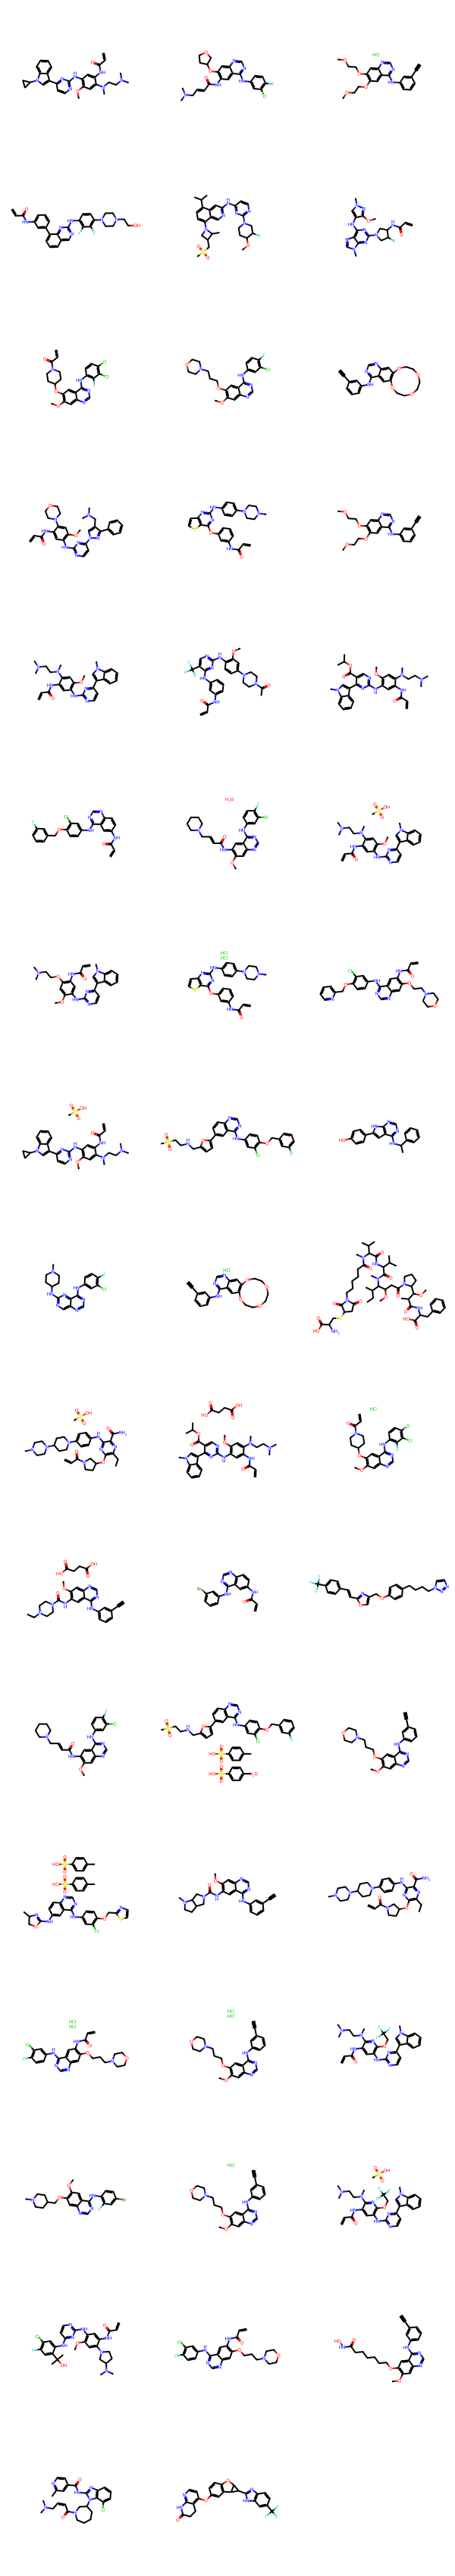

In [8]:
Draw.MolsToGridImage(EGFR_mols)

In [9]:
mcs_01 = rdFMCS.FindMCS([EGFR_mols[1], EGFR_mols[8]],ringMatchesRingOnly=True,completeRingsOnly=True)
mol_mcs_01 = Chem.MolFromSmarts(mcs_01.smartsString)

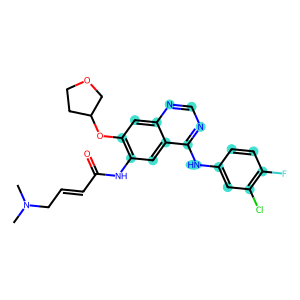

In [10]:
highlightColor=ColorConverter().to_rgb('turquoise')
Draw.MolToImage(EGFR_mols[1], highlightAtoms=EGFR_mols[1].GetSubstructMatch(mol_mcs_01),highlightColor=highlightColor)

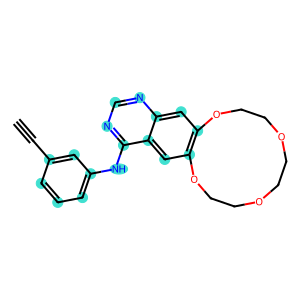

In [11]:
Draw.MolToImage(EGFR_mols[8], highlightAtoms=EGFR_mols[8].GetSubstructMatch(mol_mcs_01),highlightColor=highlightColor)

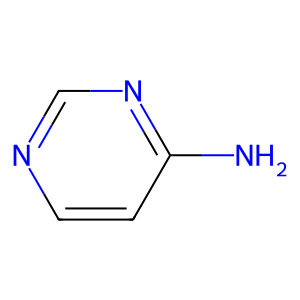

In [12]:
template = pcp.get_compounds(68958, 'cid')
template = template[0]
template = Chem.MolFromSmiles(template.canonical_smiles)
Draw.MolToImage(template)

In [13]:
EGFR_mols[0].HasSubstructMatch(template)

False

In [14]:
EGFR_mols_HasSubstruct = [x for x in EGFR_mols if x.HasSubstructMatch(template)]
len(EGFR_mols_HasSubstruct)

98

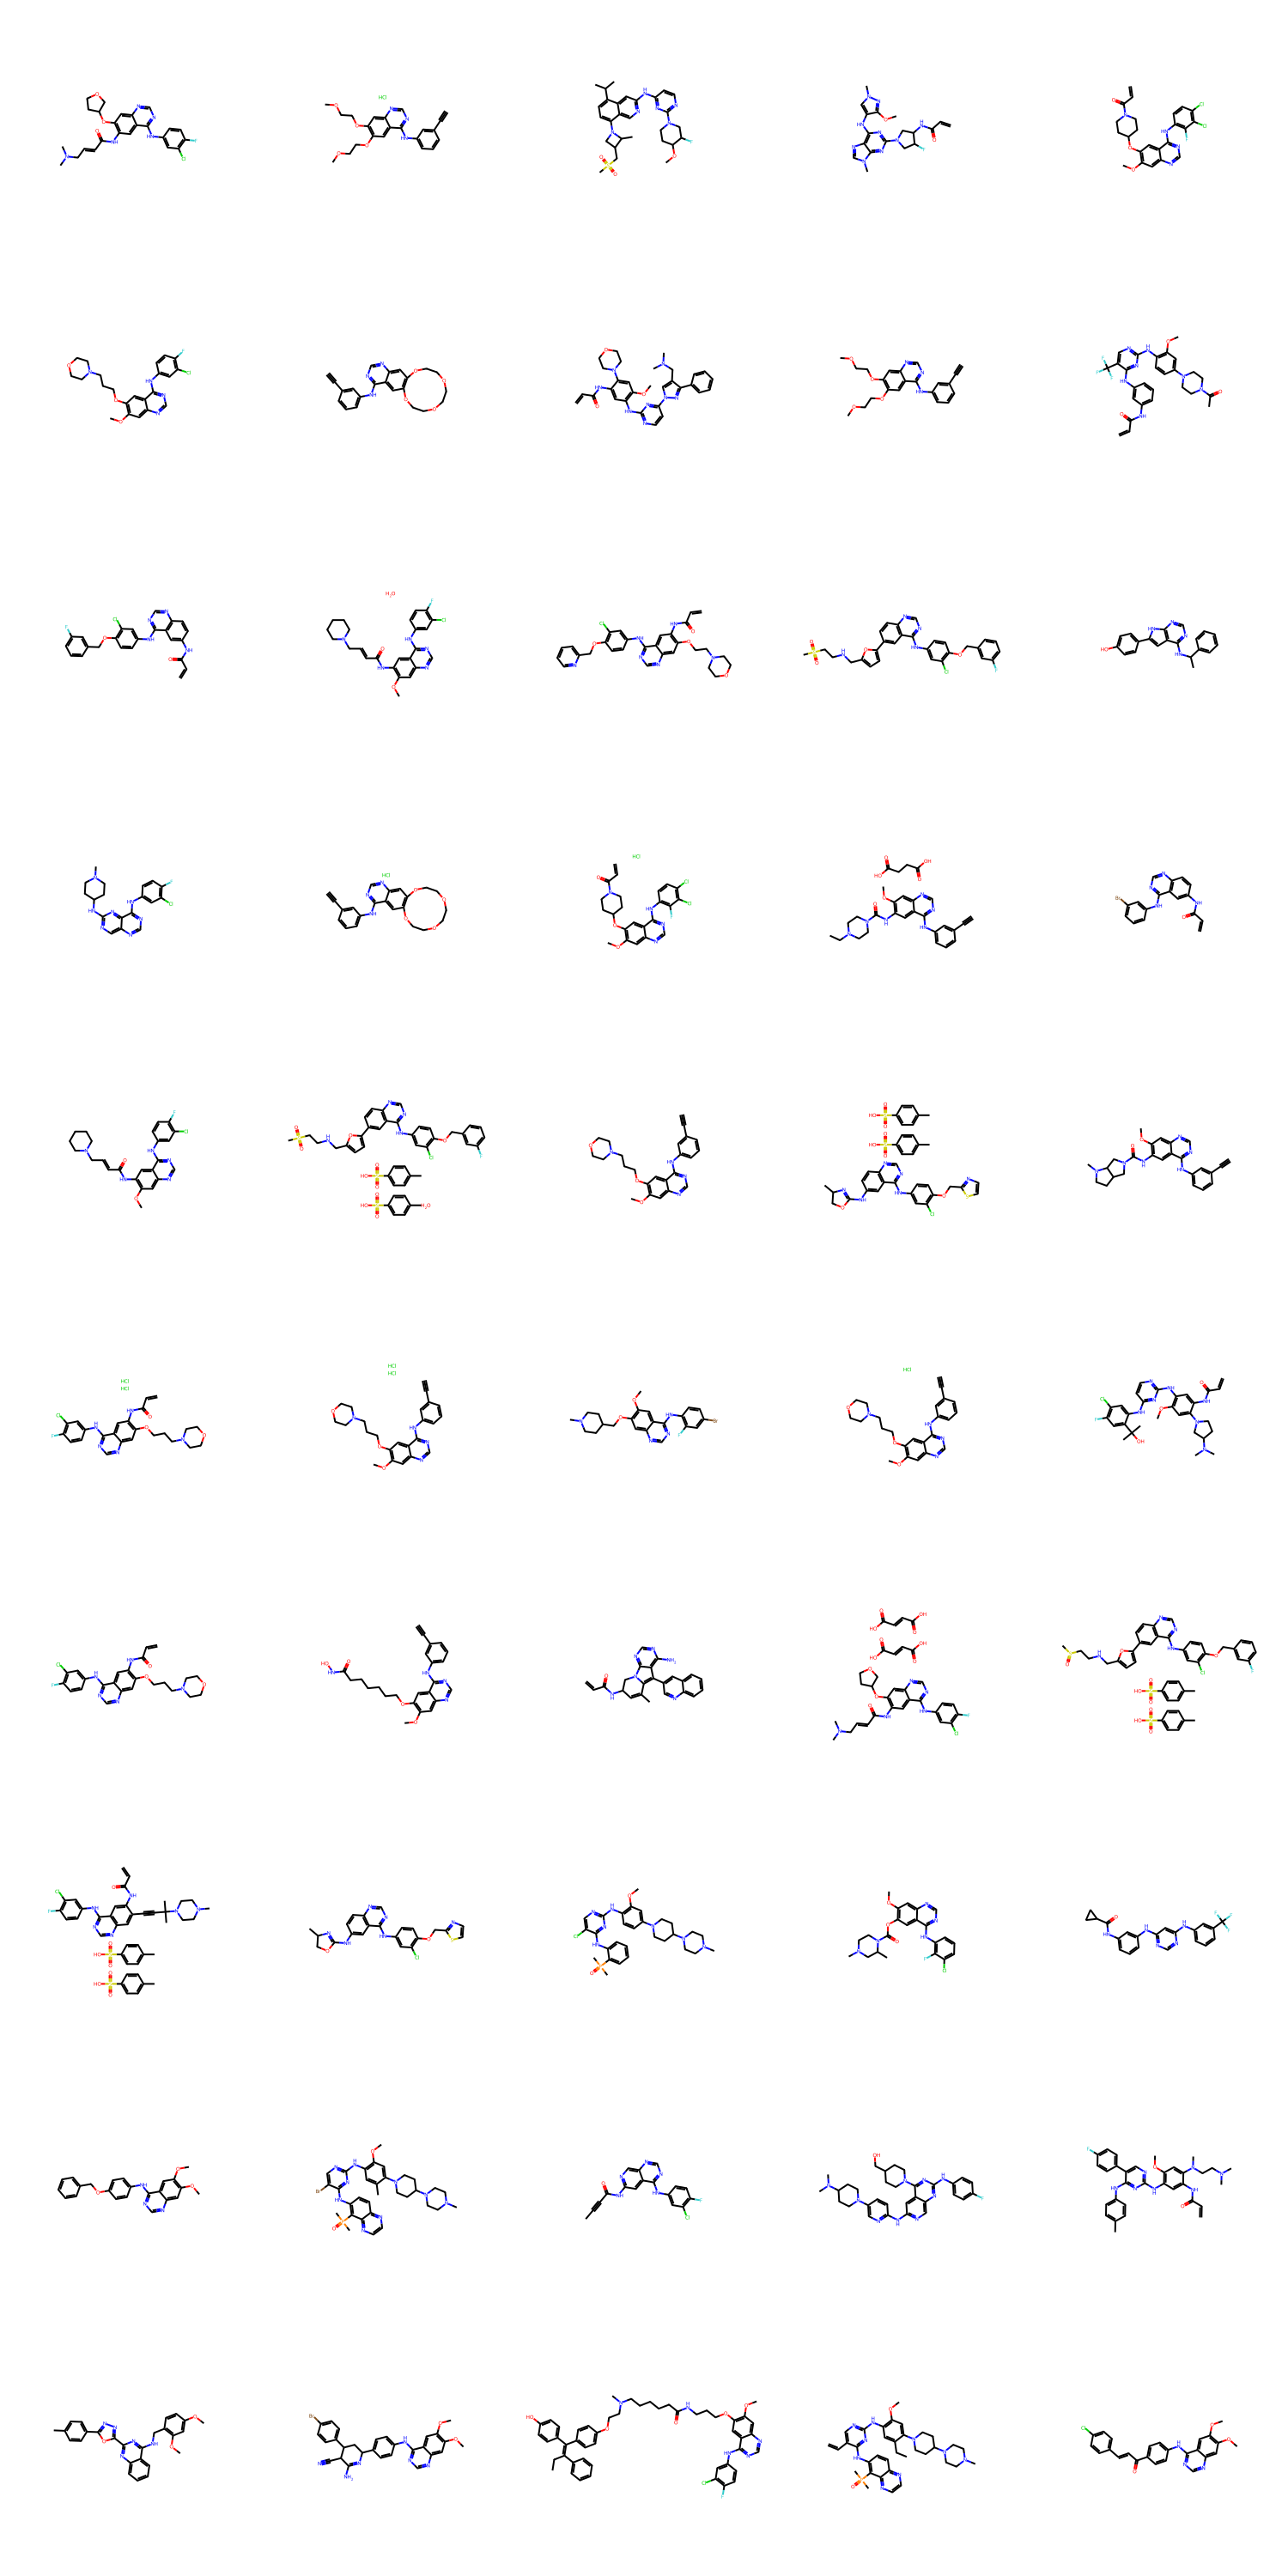

In [15]:
Draw.MolsToGridImage(EGFR_mols_HasSubstruct, molsPerRow=5, subImgSize=(300,300))

In [19]:
matched_sub = EGFR_mols_HasSubstruct[11].GetSubstructMatches(template)
matched_sub

((5, 6, 8, 9, 10, 11, 12),)

In [17]:
EGFR_mols_HasSubstruct[11].GetSubstructMatches(template)

((5, 6, 8, 9, 10, 11, 12),)

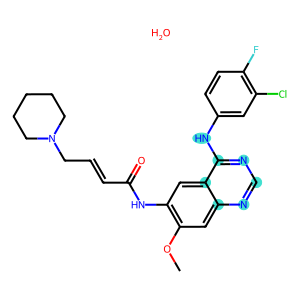

In [20]:
Draw.MolToImage(EGFR_mols_HasSubstruct[11], highlightAtoms=matched_sub[0],highlightColor=highlightColor)

/DYZ/dyz1/anaconda3/envs/gnn/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


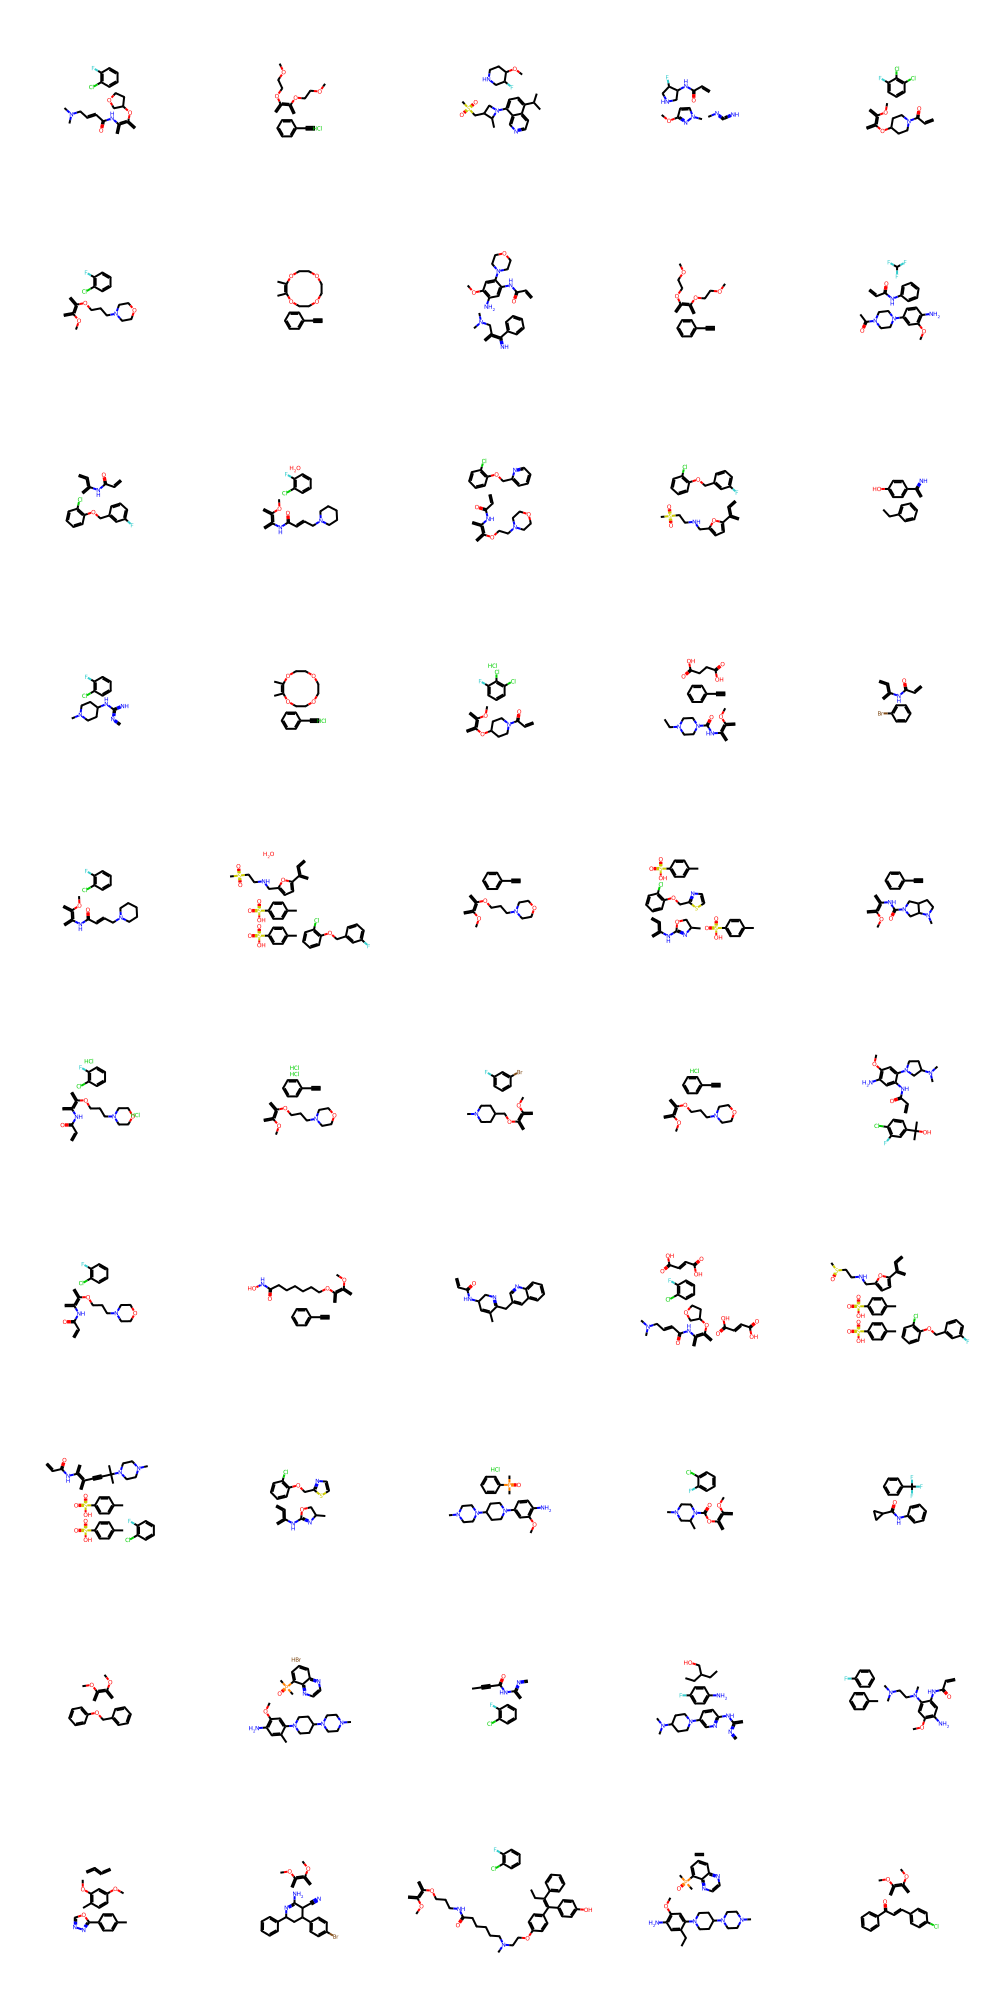

In [21]:
Sub_deleted = [AllChem.DeleteSubstructs(x, Chem.MolFromSmiles('C1=CN=CN=C1N')) for x in EGFR_mols_HasSubstruct]
Draw.MolsToGridImage(Sub_deleted, molsPerRow=5)

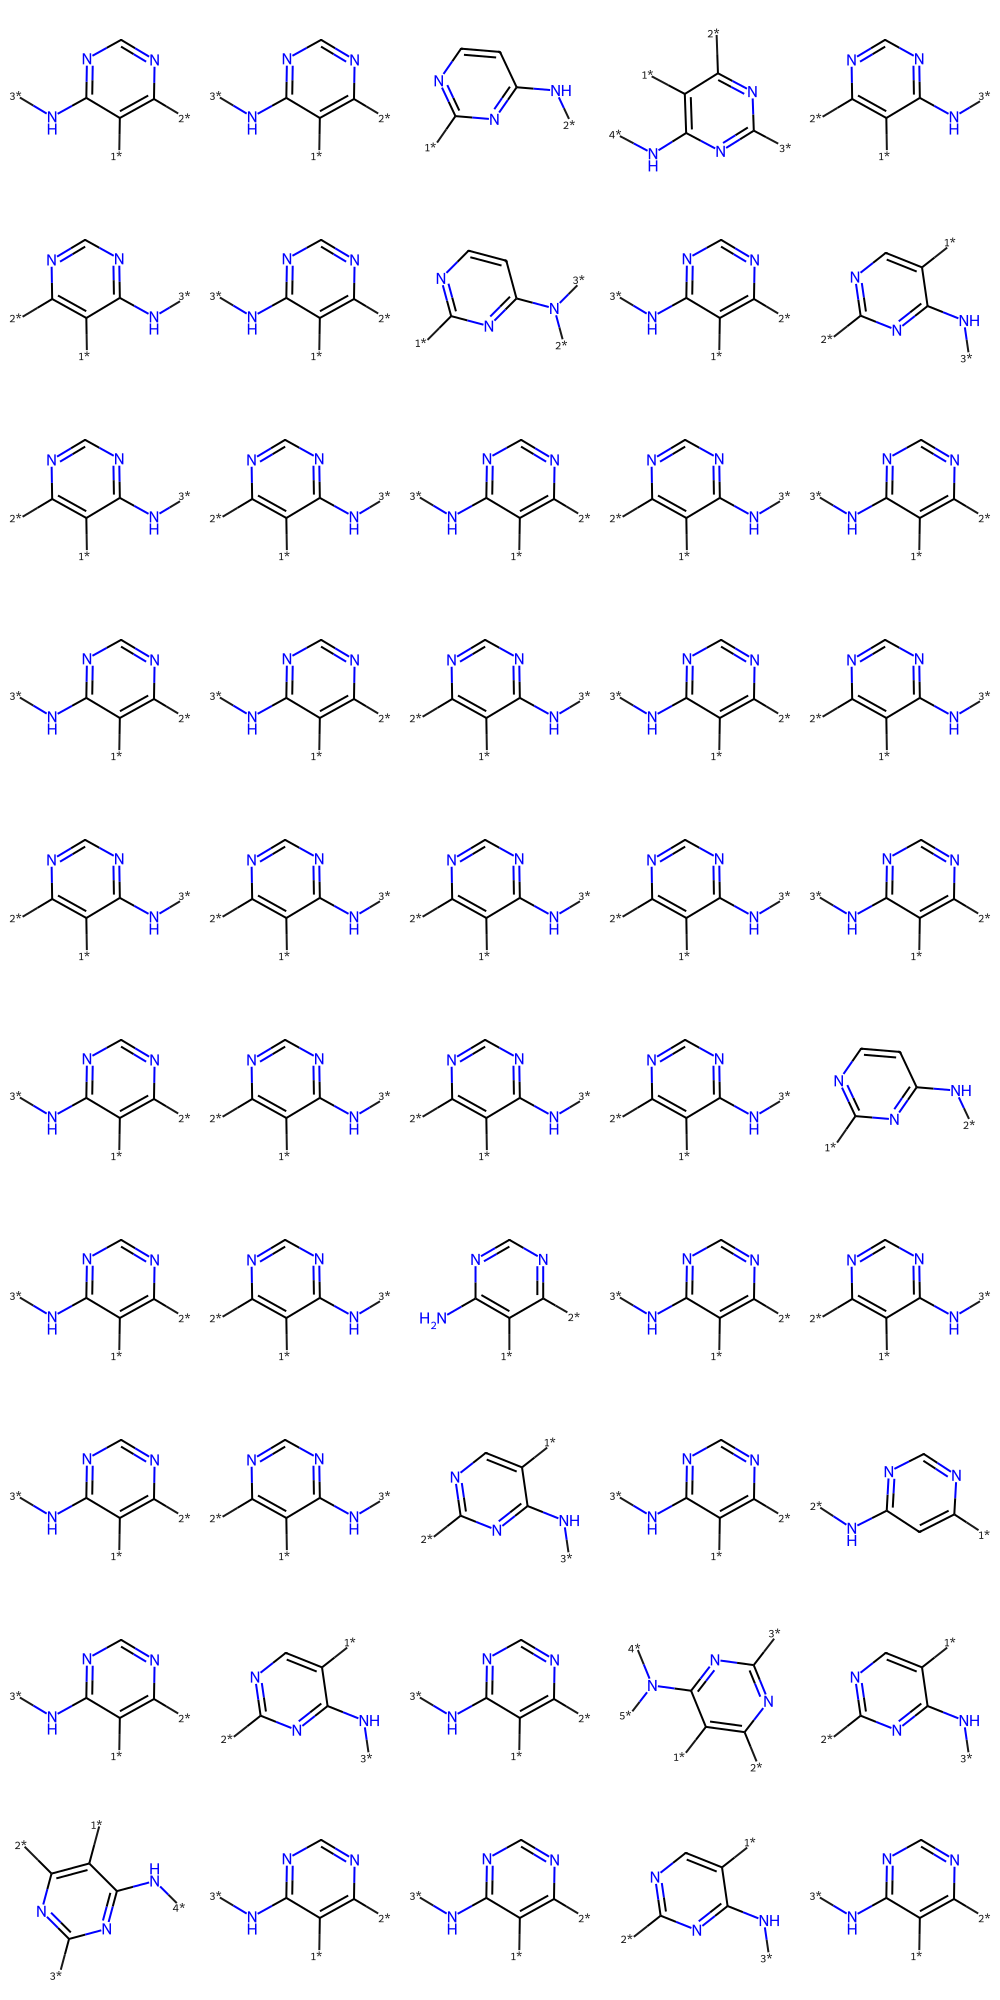

In [22]:
replace_side = [AllChem.ReplaceSidechains(x, template) for x in EGFR_mols_HasSubstruct]
Draw.MolsToGridImage(replace_side, molsPerRow=5)

In [23]:
replace_core = [AllChem.ReplaceCore(x, template) for x in EGFR_mols_HasSubstruct]
Chem.MolToSmiles(replace_core[0])

'[1*]:cc(NC(=O)C=CCN(C)C)c(c:[2*])OC1CCOC1.[3*]c1ccc(F)c(Cl)c1'

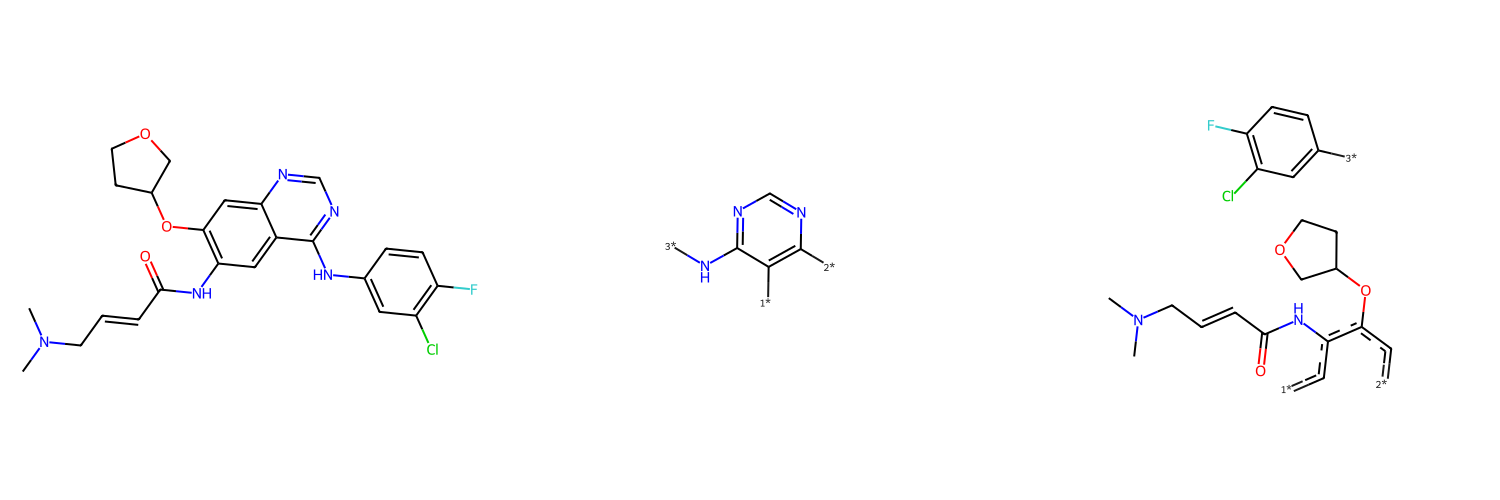

In [24]:
Draw.MolsToGridImage([EGFR_mols_HasSubstruct[0], replace_side[0], replace_core[0]],subImgSize=(500,500))


In [25]:
split_core = []
for s in Chem.MolToSmiles(replace_core[0]).split('.'):
    split_core.append(Chem.MolFromSmiles(s))
split_core

[18:18:43] non-ring atom 1 marked aromatic


[None, <rdkit.Chem.rdchem.Mol at 0x7fb3358ab330>]

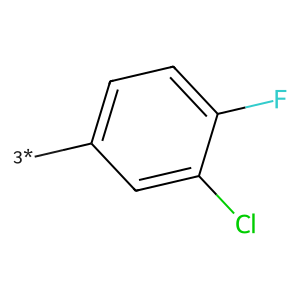

In [26]:
Draw.MolToImage(split_core[1])